In [13]:
from connec_functions import execute_to_df, generate_sparql
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import display, HTML

## Data system users

In [59]:
datasys_users = execute_to_df("2_data_system_users_info.sparql")

In [60]:
datasys_users

,datasyst_user,affiliation_id,name,group,qh,flemish,country_id,country,code_2,code_3
0,http://lifewatch-user-analysis-2023/user/ef667...,https://marineinfo.org/id/institute/5443,INBO Research Institute for Nature and Forest,http://lifewatch.org/ns/Research_institute,http://lifewatch.org/ns/Science,true,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,Kingdom of Belgium,BE,BEL
1,http://lifewatch-user-analysis-2023/user/c22e8...,https://marineinfo.org/id/institute/5443,INBO Research Institute for Nature and Forest,http://lifewatch.org/ns/Research_institute,http://lifewatch.org/ns/Science,true,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,Kingdom of Belgium,BE,BEL
2,http://lifewatch-user-analysis-2023/user/a5eae...,https://marineinfo.org/id/institute/36,VLIZ Flanders Marine Institute,http://lifewatch.org/ns/Research_institute,http://lifewatch.org/ns/Science,true,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,Kingdom of Belgium,BE,BEL
3,http://lifewatch-user-analysis-2023/user/2715d...,https://marineinfo.org/id/institute/36,VLIZ Flanders Marine Institute,http://lifewatch.org/ns/Research_institute,http://lifewatch.org/ns/Science,true,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,Kingdom of Belgium,BE,BEL
4,http://lifewatch-user-analysis-2023/user/cfde1...,https://marineinfo.org/id/institute/12964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3345,http://lifewatch-user-analysis-2023/user/4d78e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3346,http://lifewatch-user-analysis-2023/user/e38ed...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3347,http://lifewatch-user-analysis-2023/user/8bb93...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3348,http://lifewatch-user-analysis-2023/user/68982...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
datasys_users.groupby("datasyst_user").nunique()

print(f"Total of data system users: {datasys_users.groupby('datasyst_user').nunique().shape[0]}.")
print(f"--> data system users with affiliation that has an identifier: {datasys_users.groupby('datasyst_user').nunique().sum()['affiliation_id']}.")
print(f"--> data system users with affiliation that has an identifier, which has an associated name: {datasys_users.groupby('datasyst_user').nunique().sum()['name']}.")

Total of data system users: 3349.
--> data system users with affiliation that has an identifier: 2696.
--> data system users with affiliation that has an identifier, which has an associated name: 481.


In [83]:
datasys_users.groupby("affiliation_id").nunique().sum()

print(f"Total of unique affiliation identifiers: {datasys_users.groupby('affiliation_id').nunique().shape[0]}.")

Total of unique affiliation identifiers: 703.


In [86]:
datasys_users.groupby("name").nunique()

print(f"Total of unique affiliation names: {datasys_users.groupby('name').nunique().shape[0]}.")
#datasys_users.groupby("name").describe()

Total of unique affiliation names: 39.


### Quadruple Helix distribution of data system users

In [87]:
datasys_users_qh = datasys_users.groupby(['qh']).nunique()
datasys_users_qh = datasys_users_qh.rename(index={
    'http://lifewatch.org/ns/Civil_society': 'Civil_society', 
    'http://lifewatch.org/ns/Industry': 'Industry', 
    'http://lifewatch.org/ns/Policy': 'Policy',
    'http://lifewatch.org/ns/Science': 'Science'})

datasys_users_qh[['datasyst_user', 'affiliation_id']].rename(columns={'datasyst_user':'User count', 'affiliation_id':'User affiliation count'}).transpose()

qh,Civil_society,Industry,Policy,Science
User count,12,9,19,441
User affiliation count,6,7,10,16


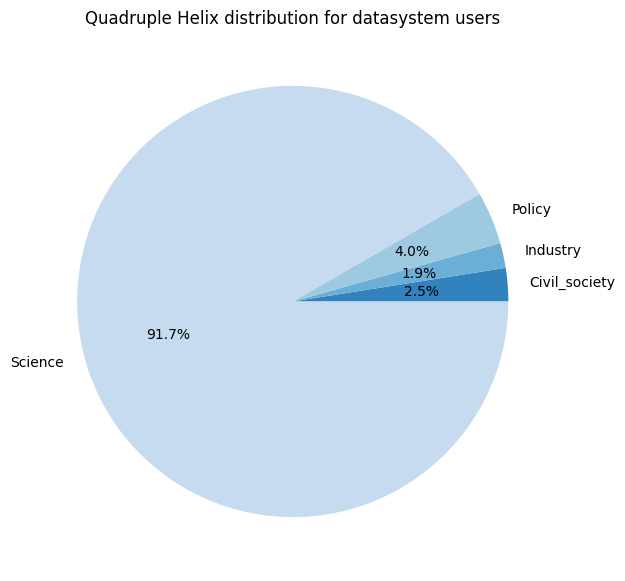

In [88]:
# Graph
cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(4))
pie_qh_user = datasys_users_qh.plot(kind='pie', y='datasyst_user', figsize=(7, 7), autopct='%1.1f%%', colors=colors, legend=False)

pie_qh_user.set_title('Quadruple Helix distribution for datasystem users')
pie_qh_user.set_ylabel('')
plt.show()

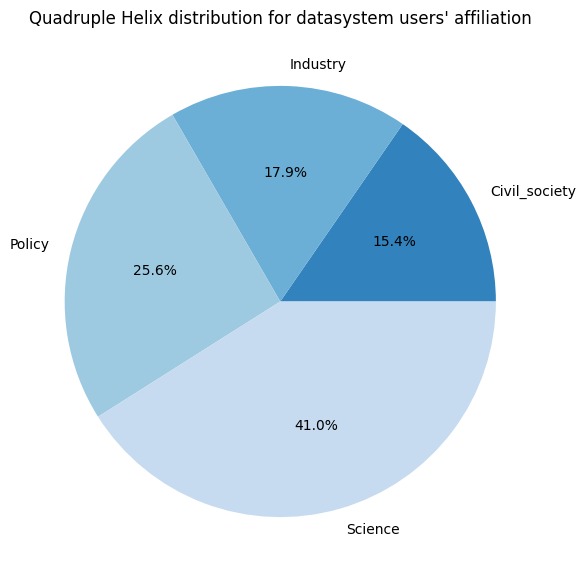

In [89]:
# Graph
cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(4))
pie_qh_user = datasys_users_qh.plot(kind='pie', y='affiliation_id', figsize=(7, 7), autopct='%1.1f%%', colors=colors, legend=False)

pie_qh_user.set_title("Quadruple Helix distribution for datasystem users' affiliation")
pie_qh_user.set_ylabel('')
plt.show()

### Number of data system users per country

In [90]:
# there are 2 species cases for country:
#      <https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AEU> = EU affiliations 
#      <https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AXAA> = personal affiliations 

datasys_users.loc[ datasys_users['country_id'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AEU' , 'country'] = 'Europe'
datasys_users.loc[ datasys_users['country_id'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AEU' , 'code_2'] = 'EU'
datasys_users.loc[ datasys_users['country_id'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AEU' , 'code_3'] = 'EUR'

datasys_users.loc[ datasys_users['country_id'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AXAA' , 'country'] = 'personal'
datasys_users.loc[ datasys_users['country_id'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AXAA' , 'code_2'] = 'personal'
datasys_users.loc[ datasys_users['country_id'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AXAA' , 'code_3'] = 'personal'

In [101]:
# wrangle dataframe into right format 
count_info = datasys_users.groupby('code_2').count()
count_info['non-flemish'] = 0
count_info['other'] = count_info['datasyst_user']

count_info.loc['BE', 'non-flemish'] = count_info.loc['BE', 'datasyst_user'] - count_info.loc['BE', 'flemish']
count_info.loc['BE', 'other'] = 0

count_info_reduced = count_info[['flemish', 'non-flemish', 'other']]

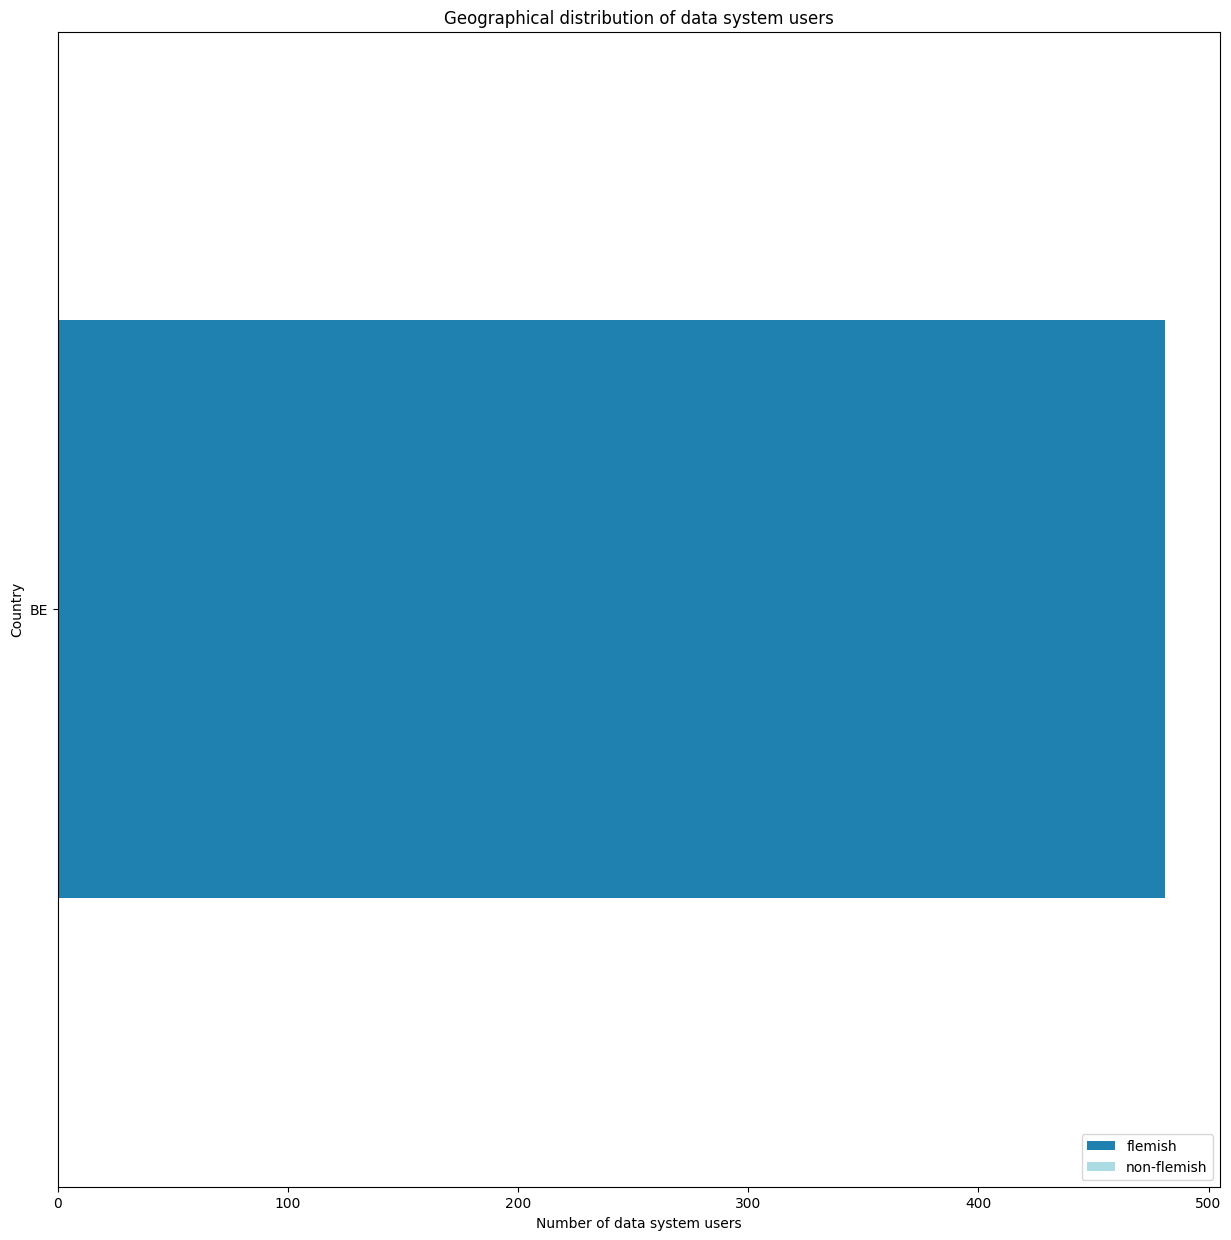

In [103]:
# Horizontal bar chart of number of data system users per country, with a distinction between flemish and non-flemish for Belgium affiliations
# side note: for those data system users for which a affiliation name could be linked!
colors = ['#1e81b0', '#abdbe3', 'lightgrey']
barh_top20 = count_info.plot(kind='barh', y=['flemish','non-flemish', 'other'], stacked=True, color=colors, figsize=(15, 15))

barh_top20.set_title('Geographical distribution of data system users')
barh_top20.set_xlabel('Number of data system users')
barh_top20.set_ylabel('Country')
barh_top20.legend(['flemish', 'non-flemish'], loc="lower right")
plt.show()

In [107]:
# table of unique datasystem users grouped per type of affiliation and quadruple helix group  
datasys_users.groupby(['qh','group']).nunique().rename(columns={'datasyst_user':'user count', 'affiliation_id':'affiliation count'})

user count  \
qh                                    group                                                          
http://lifewatch.org/ns/Civil_society http://lifewatch.org/ns/Creative_body                      1   
                                      http://lifewatch.org/ns/Non-profit_organization           10   
                                      http://lifewatch.org/ns/Other                              1   
http://lifewatch.org/ns/Industry      http://lifewatch.org/ns/Company                            7   
                                      http://lifewatch.org/ns/Consultancy                        2   
http://lifewatch.org/ns/Policy        http://lifewatch.org/ns/Defence                            4   
                                      http://lifewatch.org/ns/Governmental_body                 13   
                                      http://lifewatch.org/ns/Other_public_authorities           2   
http://lifewatch.org/ns/Science       http://lifewatch.org/ns/Data_infrastructure                4   
                                      http://lifewatch.org/ns/International_programme           11   
                                      http://lifewatch.org/ns/Museum                            10   
                                      http://lifewatch.org/ns/Research_institute               293   
                                      http://lifewatch.org/ns/University                       123   

                                                                                        affiliation count  \
qh                                    group                                                                 
http://lifewatch.org/ns/Civil_society http://lifewatch.org/ns/Creative_body                             1   
                                      http://lifewatch.org/ns/Non-profit_organization                   4   
                                      http://lifewatch.org/ns/Other                                     1   
http://lifewatch.org/ns/Industry      http://lifewatch.org/ns/Company                                   6   
                                      http://lifewatch.org/ns/Consultancy                               1   
http://lifewatch.org/ns/Policy        http://lifewatch.org/ns/Defence                                   1   
                                      http://lifewatch.org/ns/Governmental_body                         7   
                                      http://lifewatch.org/ns/Other_public_authorities                  2   
http://lifewatch.org/ns/Science       http://lifewatch.org/ns/Data_infrastructure                       1   
                                      http://lifewatch.org/ns/International_programme                   1   
                                      http://lifewatch.org/ns/Museum                                    2   
                                      http://lifewatch.org/ns/Research_institute                        6   
                                      http://lifewatch.org/ns/University                                6   

                                                                                        name  \
qh                                    group                                                    
http://lifewatch.org/ns/Civil_society http://lifewatch.org/ns/Creative_body                1   
                                      http://lifewatch.org/ns/Non-profit_organization      4   
                                      http://lifewatch.org/ns/Other                        1   
http://lifewatch.org/ns/Industry      http://lifewatch.org/ns/Company                      6   
                                      http://lifewatch.org/ns/Consultancy                  1   
http://lifewatch.org/ns/Policy        http://lifewatch.org/ns/Defence                      1   
                                      http://lifewatch.org/ns/Governmental_body            7   
                                      http://lifewatch.or